In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [8]:
cancer_df= pd.read_csv('haberman.csv')
cancer_df.columns=['Age','Operted_Yr','pstive_lymph_nodes','surv_status_after_5_yrs']
cancer_df.head()



,Age,Operted_Yr,pstive_lymph_nodes,surv_status_after_5_yrs
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      305 non-null    int64
 1   Operted_Yr               305 non-null    int64
 2   pstive_lymph_nodes       305 non-null    int64
 3   surv_status_after_5_yrs  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
cancer_df['surv_status_after_5_yrs']=cancer_df['surv_status_after_5_yrs'].map({1:'Yes',2:'No'})
cancer_df['surv_status_after_5_yrs']=cancer_df['surv_status_after_5_yrs'].astype('category')
cancer_df.head(3)
new_df1=cancer_df.copy()
new_df1.head()

,Age,Operted_Yr,pstive_lymph_nodes,surv_status_after_5_yrs
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [11]:
(cancer_df['surv_status_after_5_yrs'].value_counts()/cancer_df.shape[0])*100

Yes    73.442623
No     26.557377
Name: surv_status_after_5_yrs, dtype: float64

### Histogram

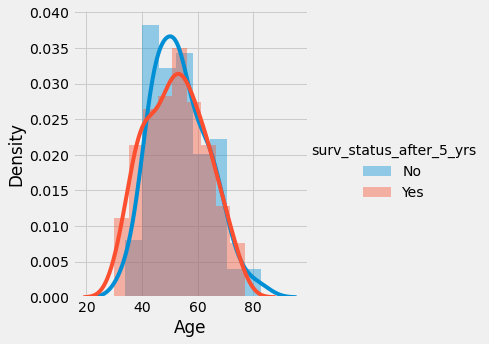

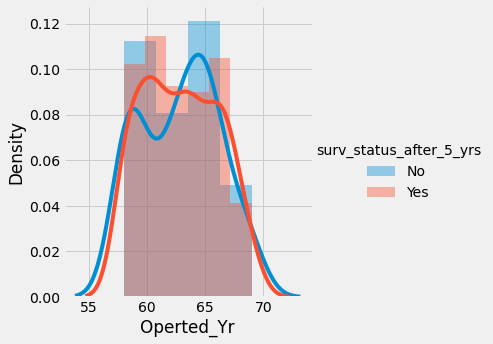

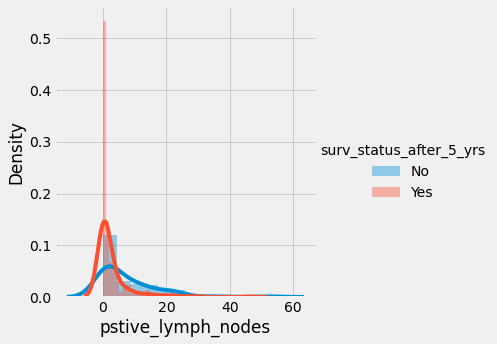

In [12]:
#creating multiple graphs from columns with facetgrid
for idx, feature in enumerate(list(new_df1.columns)[:-1]):
    fg = sns.FacetGrid(new_df1, hue='surv_status_after_5_yrs', size=5)
    fg.map(sns.distplot, feature).add_legend()
    

### Boxplot

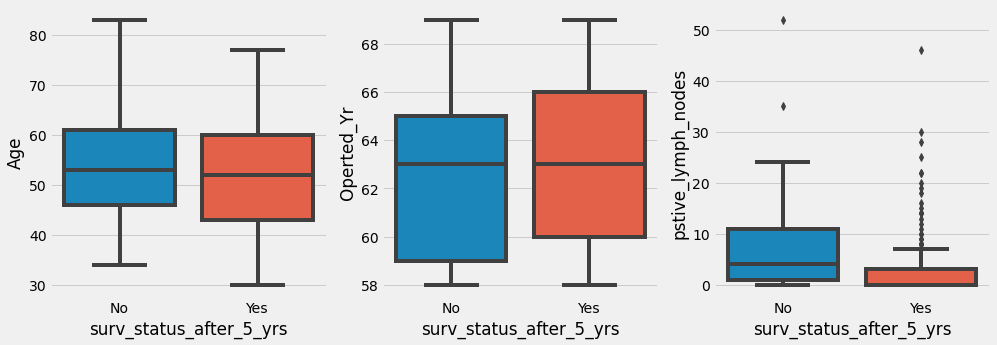

In [13]:
fig, axes= plt.subplots(1,3, figsize=(15,5))
for idx, feature in enumerate(list(new_df1.columns)[:-1]):
     sns.boxplot(data=new_df1, x='surv_status_after_5_yrs', y= feature, ax= axes[idx])

### Violinplot

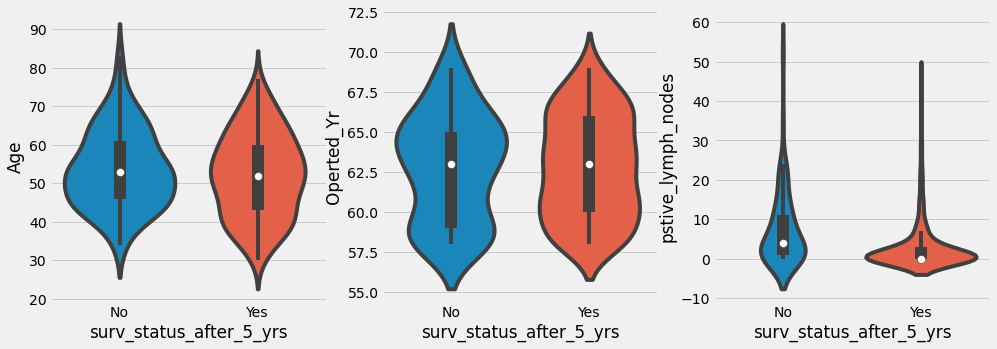

In [14]:
fig, ax= plt.subplots(1,3, figsize=(15,5))
for idx,feature in enumerate(new_df1.columns[:-1]):
        sns.violinplot(data=new_df1, x='surv_status_after_5_yrs', y=feature, ax=ax[idx])
        

# Univariate Analysis

### Age

In [15]:
#creating a statiscal summary of Age 
cancer_df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

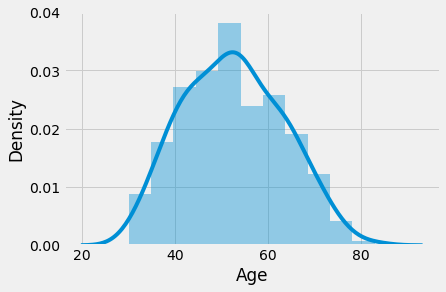

In [16]:
#creating a distribution of age
sns.distplot(cancer_df['Age'])

Text(0.5, 0.98, 'Patients a/c age bands')

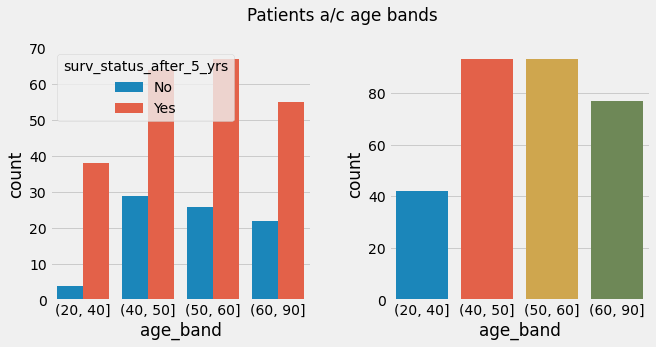

In [17]:
#analysis of segment wise age survival
age_band=[20,40,50,60,90]
cancer_df['age_band']=pd.cut(cancer_df['Age'],bins=age_band )
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3)
sns.countplot(ax=axes[0],data=cancer_df, x='age_band',hue='surv_status_after_5_yrs')
sns.countplot(ax=axes[1],data=cancer_df, x='age_band')
fig.suptitle('Patients a/c age bands')
    

### Conclusion
Age is evenly spread out a/c to the above figure around mean which is also refleacted when we look w.r.t those who survived.
Taking apart age segment wise with 10 yrs difference band here also age distribution looks more or less same. So, it concludes that age has little role to play in survivality of the patient after 5 years.

### Operated Year

<AxesSubplot:xlabel='Operted_Yr', ylabel='count'>

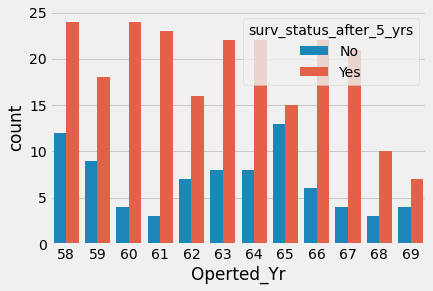

In [18]:
sns.countplot(data=cancer_df, x='Operted_Yr', hue='surv_status_after_5_yrs')

### Conclusion
If we look at the year in which the maximum fatalities took place it would be 1965 and the least would 1960

<AxesSubplot:xlabel='Operated_Yr_band', ylabel='count'>

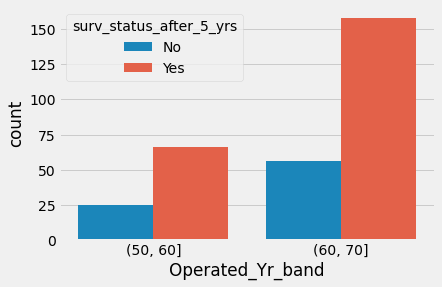

In [19]:
decade=[50,60,70]
cancer_df['Operated_Yr_band']= pd.cut(cancer_df['Operted_Yr'], bins=decade)
cancer_df['Operated_Yr_band'].value_counts()
sns.countplot(data= cancer_df, x='Operated_Yr_band', hue='surv_status_after_5_yrs')

In [20]:
#calcu;ating seperately not survived values and total cases values
var=(cancer_df['surv_status_after_5_yrs']=='No')
a=cancer_df[var]['Operated_Yr_band'].value_counts()
b=cancer_df.groupby('Operated_Yr_band').agg({'Operated_Yr_band':'count'})
#making it in a dataframe
op_data= pd.concat([a,b], axis=1)
op_data.columns=['Not Survived','Total']
op_data["result pc"] = (op_data["Not Survived"].div(op_data["Total"].values))*100
op_data=op_data[::-1]
op_data

,Not Survived,Total,result pc
"(50, 60]",25,91,27.472527
"(60, 70]",56,214,26.168224


### Positive Lymph Nodes

In [21]:
cancer_df['pstive_lymph_nodes'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: pstive_lymph_nodes, dtype: float64

<AxesSubplot:xlabel='surv_status_after_5_yrs', ylabel='pstive_lymph_nodes'>

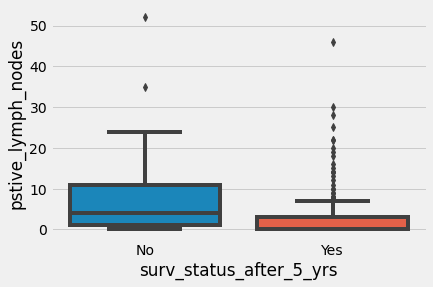

In [37]:
sns.boxplot(data=cancer_df, y='pstive_lymph_nodes',x='surv_status_after_5_yrs')

[Text(0.5, 1.0, 'Lymph Nodes Distribution')]

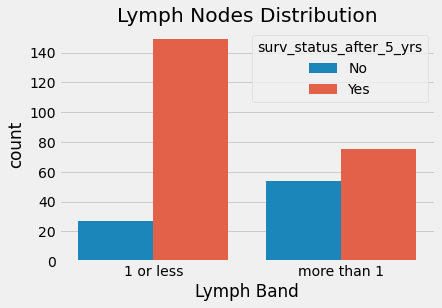

In [116]:
bins=[0,1,55]
labels=['1 or less','more than 1']
cancer_df['Lymph Band']=pd.cut(cancer_df['pstive_lymph_nodes'],bins=bins,labels=labels, include_lowest=True)
sns.countplot(data=cancer_df, x='Lymph Band',hue='surv_status_after_5_yrs').set(title='Lymph Nodes Distribution')

### Conclusion

1. Regarding number of lymph nodes alot of outliers are seen in which survived as compared to the people who have not survived.
2. In the second figure if the lymph node numebr increases  beyond 1 then survival percentages is same as mortality which clearly states the red lines regarding number of lymph nodes


# Bivariate Analysis

<AxesSubplot:>

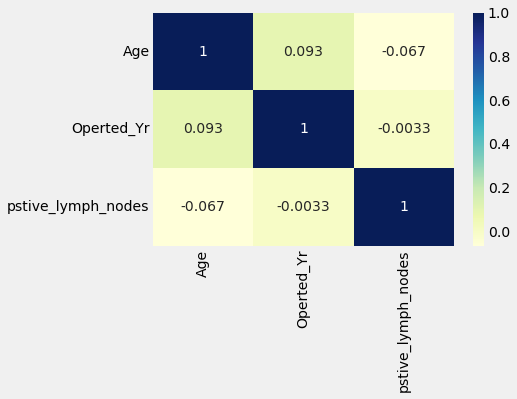

In [121]:
#seeing the correlation between features
sns.heatmap(cancer_df.corr(),cmap="YlGnBu",annot=True)

### Coclusion
From the above figure it clearly shows that none of the abpove features are interrelated to each other and have independant coexistance.

<AxesSubplot:xlabel='Age', ylabel='pstive_lymph_nodes'>

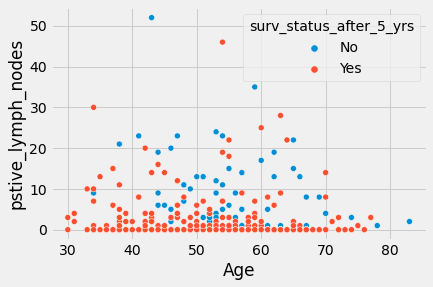

In [57]:
sns.scatterplot(data=cancer_df, y='pstive_lymph_nodes',x='Age', hue='surv_status_after_5_yrs')

## Heatmap

In [58]:
pd.crosstab(cancer_df['age_band'],cancer_df['surv_status_after_5_yrs'])

surv_status_after_5_yrs,No,Yes
age_band,,
"(20, 40]",4,38
"(40, 50]",29,64
"(50, 60]",26,67
"(60, 90]",22,55


<AxesSubplot:xlabel='surv_status_after_5_yrs', ylabel='age_band'>

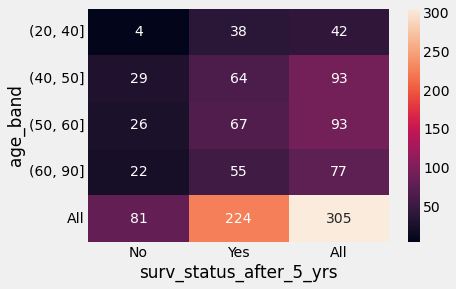

In [113]:
x=pd.crosstab(cancer_df['age_band'],cancer_df['surv_status_after_5_yrs'], margins= True)
sns.heatmap(x, annot=True, fmt='g')

[Text(0.5, 1.0, 'Patients who have not survived')]

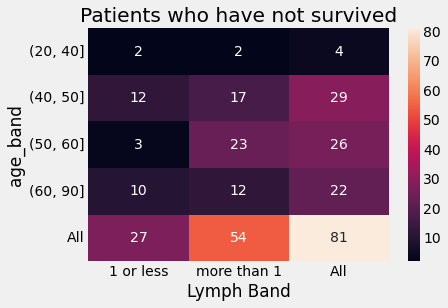

In [118]:
var=(cancer_df['surv_status_after_5_yrs']=='No')
x= pd.crosstab(cancer_df[var]['age_band'],cancer_df[var]['Lymph Band'], margins= True)
sns.heatmap(x, annot=True, fmt='g').set(title="Patients who have not survived")

### Coclusion
Here we see in this bivariate analysis regarding age band v/s lymph nodes that with 50-60 age band the non survival after 5 yrs of operation drastically drops to 3 from a normal 10-12 average even though the number of pateints remaining same as 93